In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import cv2
import dlib
import glob
from pathlib import Path
from imutils import face_utils

In [2]:
mylist = [Path(f).stem for f in glob.glob("/home/ahmad/projects/python/head_pose_estimation/AFLW2000-3D/AFLW2000/*.mat")]
print(len(mylist))
for i in mylist[:10]:
    print(i)


2000
image01671
image02453
image04279
image01751
image04088
image01850
image00735
image00167
image02553
image03665


In [3]:
mat = sio.loadmat("/home/ahmad/projects/python/head_pose_estimation/AFLW2000-3D/AFLW2000/image01152.mat")
print(type(mat))

<class 'dict'>


In [4]:
for k in mat.keys():
    print(k)

__header__
__version__
__globals__
pt2d
Illum_Para
Color_Para
Tex_Para
Shape_Para
Exp_Para
Pose_Para
roi
pt3d_68


In [5]:
type(mat.get('pt2d'))

numpy.ndarray

In [6]:
type(mat.get('Pose_Para'))

numpy.ndarray

In [7]:
print(mat.get('pt2d').shape)
print(mat.get('Pose_Para').shape)

(2, 21)
(1, 7)


In [8]:
print(mat.get('pt2d'))
print(mat.get('Pose_Para'))

[[137.95652174 157.52173913 199.44720497 258.14285714 286.0931677
  311.2484472  157.52173913 174.29192547 205.03726708 263.73291925
  286.0931677  314.04347826 132.36645963 193.85714286 221.80745342
  244.16770186 330.8136646  185.47204969 224.60248447 263.73291925
  219.01242236]
 [193.85714286 168.70186335 182.67701863 185.47204969 174.29192547
  182.67701863 216.2173913  213.42236025 210.62732919 216.2173913
  216.2173913  219.01242236 314.04347826 263.73291925 244.16770186
  269.32298137 322.42857143 308.45341615 302.86335404 308.45341615
  375.53416149]]
[[ 2.7430168e-01  7.7798083e-02  3.2024056e-02  2.3919304e+02
   1.6002512e+02 -1.2361505e+02  1.6468219e-03]]


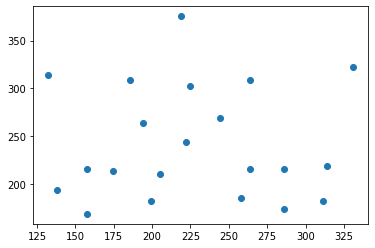

In [9]:
plt.scatter(mat.get('pt2d')[0], mat.get('pt2d')[1])

In [10]:
pitch, yaw, roll = mat.get('Pose_Para')[0, :3]
yaw, pitch, roll

(0.07779808, 0.27430168, 0.032024056)

In [11]:
mat.get('pt3d_68')

array([[ 124.14061  ,  126.804344 ,  134.16084  ,  140.71915  ,
         148.98509  ,  160.07295  ,  171.57092  ,  188.9516   ,
         222.21634  ,  258.45227  ,  283.05142  ,  300.30603  ,
         315.42242  ,  325.5144   ,  334.16867  ,  344.1835   ,
         349.19458  ,  139.8035   ,  150.36566  ,  165.76602  ,
         181.9744   ,  196.81497  ,  256.77426  ,  272.74664  ,
         289.99182  ,  307.92236  ,  320.91837  ,  226.2161   ,
         224.64725  ,  223.01852  ,  222.20995  ,  204.58403  ,
         212.31873  ,  223.08867  ,  234.96585  ,  244.1324   ,
         157.44135  ,  167.0454   ,  182.56595  ,  197.07909  ,
         183.45497  ,  167.5631   ,  260.0956   ,  277.4557   ,
         293.61572  ,  302.93625  ,  292.02005  ,  274.3109   ,
         180.32077  ,  192.83334  ,  211.3893   ,  221.61876  ,
         232.29692  ,  250.8645   ,  264.93707  ,  248.8485   ,
         235.07506  ,  220.68832  ,  207.17802  ,  194.84076  ,
         184.22537  ,  208.29208  ,  221

In [12]:
def decompose(A, k):
    U, sigma, V = np.linalg.svd(A)
    
    U = np.matrix(U[:, :k])
    D = np.diag(sigma[:k])
    V = np.matrix(V[:k, :])
    return U * D * V


In [13]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/home/ahmad/projects/python/head_pose_estimation/data')
img = 'image00002'
p = f'/home/ahmad/projects/python/head_pose_estimation/AFLW2000-3D/AFLW2000/{img}.jpg'
image = cv2.imread(p)
# image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale image
rects = detector(gray, 1)

points = None
# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    points = shape.copy()
    print('i =', i, 'arr =', shape.shape)
    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    # x, y, w, h = face_utils.rect_to_bb(rect)
    # cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # # show the face number
    # cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
    #     cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
        
# show the output image with the face detections + facial landmarks
# cv2.imshow(img, image)
# cv2.waitKey(0)


i = 0 arr = (68, 2)


In [14]:
# tmp = np.zeros(shape=(image.shape[0], image.shape[1]))
# for p in points:
#     tmp[p[1], p[0]] = 255 

# cv2.imshow(img, tmp)
# for i in range(1, 102, 10):
#     s = decompose(tmp, k=i)
#     cv2.imshow(f'decomposed_k={i}', s)
# cv2.waitKey(0)

In [15]:
pts_68 = mat.get('pt3d_68')
pts_68.shape
pts_68[:2]

array([[124.14061 , 126.804344, 134.16084 , 140.71915 , 148.98509 ,
        160.07295 , 171.57092 , 188.9516  , 222.21634 , 258.45227 ,
        283.05142 , 300.30603 , 315.42242 , 325.5144  , 334.16867 ,
        344.1835  , 349.19458 , 139.8035  , 150.36566 , 165.76602 ,
        181.9744  , 196.81497 , 256.77426 , 272.74664 , 289.99182 ,
        307.92236 , 320.91837 , 226.2161  , 224.64725 , 223.01852 ,
        222.20995 , 204.58403 , 212.31873 , 223.08867 , 234.96585 ,
        244.1324  , 157.44135 , 167.0454  , 182.56595 , 197.07909 ,
        183.45497 , 167.5631  , 260.0956  , 277.4557  , 293.61572 ,
        302.93625 , 292.02005 , 274.3109  , 180.32077 , 192.83334 ,
        211.3893  , 221.61876 , 232.29692 , 250.8645  , 264.93707 ,
        248.8485  , 235.07506 , 220.68832 , 207.17802 , 194.84076 ,
        184.22537 , 208.29208 , 221.06358 , 233.99815 , 261.76688 ,
        234.11826 , 220.78401 , 208.16008 ],
       [257.7826  , 286.46597 , 314.23242 , 336.34048 , 356.90057 ,
   

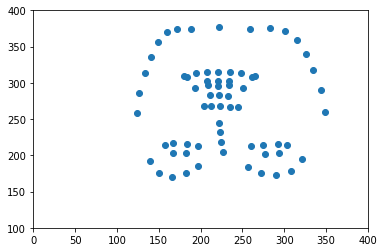

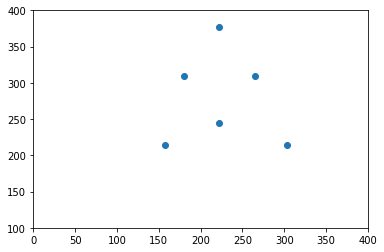

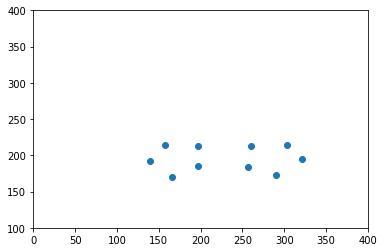

In [16]:
pts_68_xy_6 = pts_68[:2, [30, 8, 36, 45, 48, 54]]
pts_68_xy_21 = pts_68[:2, [17, 19, 21, 22, 24, 26, 36, 39, 42, 45]]
pts_68_xy_6.shape

plt.scatter(pts_68[0], pts_68[1])
plt.xlim((0, 400))
plt.ylim((100, 400))
plt.show()

plt.scatter(pts_68_xy_6[0], pts_68_xy_6[1])
plt.xlim((0, 400))
plt.ylim((100, 400))
plt.show()

plt.scatter(pts_68_xy_21[0], pts_68_xy_21[1])
plt.xlim((0, 400))
plt.ylim((100, 400))
plt.show()

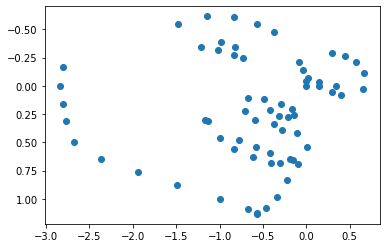

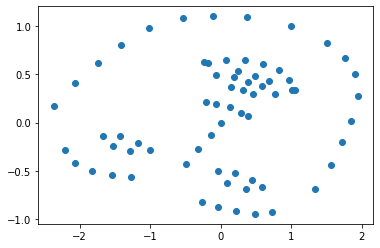

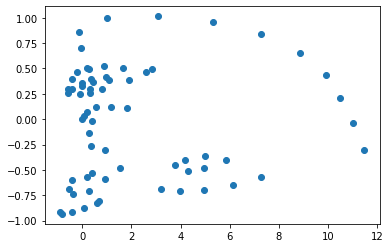

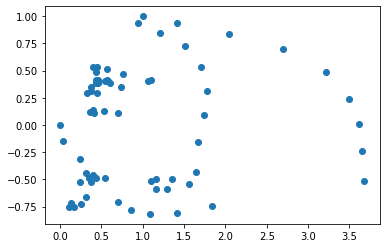

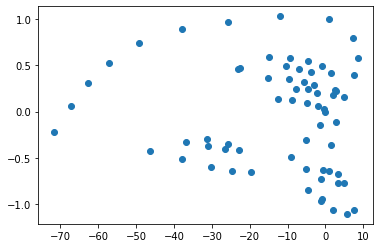

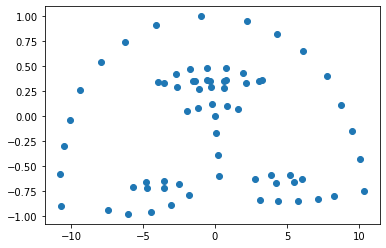

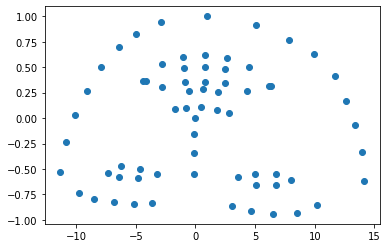

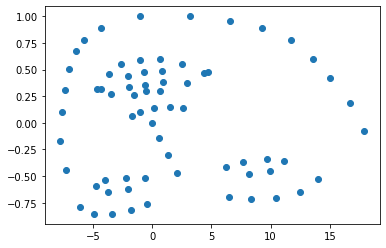

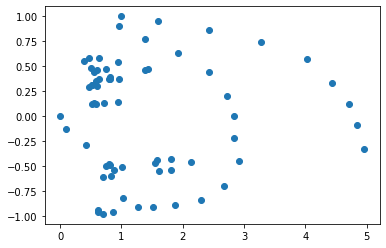

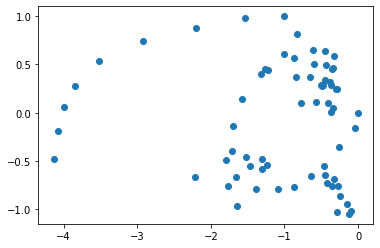

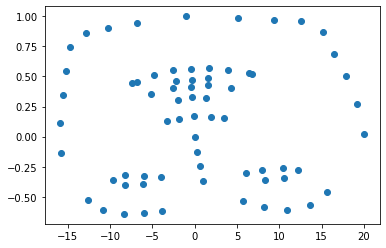

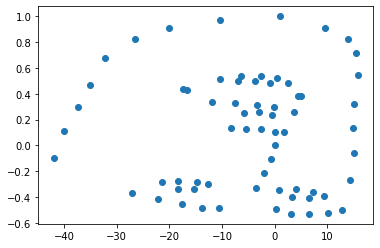

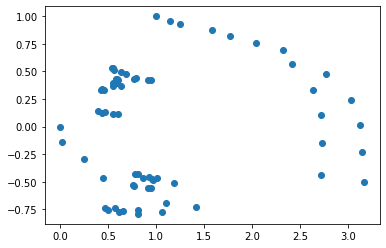

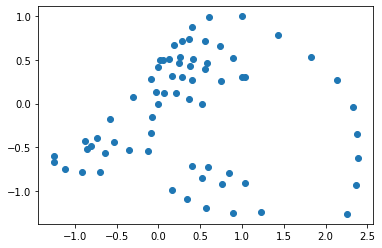

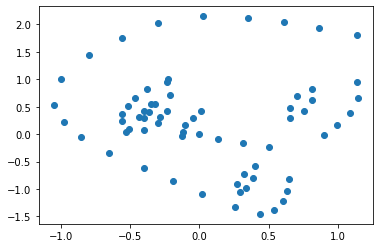

In [17]:
def _get_21_points(marks):
    nose_point = marks[30]
    features = (marks - nose_point)
    d = np.abs(features[30] - features[8])
    features = features / d

    # print('nose_point =', nose_point)
    # print('features =', features)
    # features = np.array(features).flatten(order='F')
    # return features.reshape(1, -1)
    return features


data_dir = Path('/home/ahmad/projects/python/head_pose_estimation/AFLW2000-3D/AFLW2000')
all_imgs = glob.glob(str(data_dir / '*.mat'))
plt.gca().invert_yaxis()
for img in all_imgs[10:25]:
    mat = sio.loadmat(img)
    features = np.array(_get_21_points(mat.get('pt3d_68')[:2].T))

    x = features[:, 0]
    y = features[:, 1]
    
    plt.scatter(x, y)
    plt.show()

In [18]:
# Run utils.py first as a script to generate the data frames.

df_21pts = pd.read_csv('../cleaned_data_21pts.csv', index_col=0)
df_21pts.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,y13,y14,y15,y16,y17,y18,y19,pitch,yaw,roll
image00002,-0.892009,-0.591090,-0.161206,0.354654,0.816779,1.171434,-0.655573,-0.182701,0.376148,0.870515,...,0.064483,0.290172,0.526608,0.397643,0.999480,-0.601837,-0.376148,-22.874239,1.044306,4.908885
image00004,-0.518030,-0.331539,-0.051803,0.341900,0.745964,1.150028,-0.383343,-0.041442,0.435146,0.849570,...,0.145049,0.414424,0.435146,0.497309,0.994618,0.000000,0.062164,26.932741,68.155235,17.243670
image00006,-0.171021,-0.171021,-0.020120,0.221321,0.523122,0.965763,-0.110660,0.090540,0.392341,0.724323,...,0.080480,0.352101,0.402401,0.331981,0.915463,-0.110660,-0.201201,-10.579652,50.485409,-13.570644
image00008,-0.697837,-0.634397,-0.338345,0.084586,0.496944,0.951595,-0.486371,-0.137453,0.274905,0.708410,...,-0.021147,0.285479,0.327772,0.126879,0.835289,-0.296052,-0.708410,-10.048455,17.143373,-21.392780
image00013,-0.753426,-0.541790,-0.245498,0.067724,0.364015,0.626444,-0.533324,-0.228567,0.152378,0.457135,...,0.076189,0.474066,0.414808,0.355549,0.973528,0.228567,-0.126982,-1.536199,0.685565,-12.643007


In [19]:
df_21pts.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,y13,y14,y15,y16,y17,y18,y19,pitch,yaw,roll
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,...,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,-0.753716,-0.502542,-0.181636,0.178666,0.503749,0.763675,-0.553867,-0.210707,0.218990,0.565114,...,0.098477,0.399629,0.451692,0.394307,0.953265,-0.085192,-0.104431,-5.678418,1.014354,-0.748782
std,0.351272,0.238451,0.170048,0.172543,0.245769,0.365745,0.259923,0.189471,0.191210,0.268338,...,0.046993,0.095594,0.072770,0.102006,0.117027,0.256192,0.262830,16.668706,31.167982,18.907408
min,-1.705505,-1.343503,-0.919239,-0.537401,-0.830783,-1.191993,-1.248913,-0.749533,-0.565896,-0.866904,...,-0.180605,-0.469573,-0.548368,-0.626097,-0.999347,-1.129353,-1.218975,-151.041275,-95.541000,-218.903412
25%,-0.996104,-0.656094,-0.288484,0.080045,0.372076,0.559464,-0.733335,-0.339049,0.106338,0.418950,...,0.071838,0.349594,0.422121,0.344828,0.943097,-0.238473,-0.257492,-14.038636,-14.048275,-8.901038
50%,-0.802622,-0.541346,-0.194220,0.186936,0.527851,0.815053,-0.596517,-0.233843,0.239261,0.611363,...,0.103019,0.409374,0.451232,0.406916,0.982116,-0.082510,-0.085331,-7.037071,1.169819,-0.902287
75%,-0.552344,-0.372934,-0.083128,0.281737,0.657253,1.015044,-0.410232,-0.091408,0.350980,0.747240,...,0.129295,0.461504,0.482513,0.457716,0.996483,0.080007,0.065992,1.525558,17.029309,7.059970
max,0.875933,0.614160,0.489275,0.965674,1.442073,1.751089,0.644364,0.460645,0.763997,1.248939,...,0.247175,0.710389,0.729831,0.696585,1.000000,0.861346,0.732690,195.868591,85.316986,124.108765


In [20]:
for c in df_21pts.columns:
    if len(df_21pts[c].unique()) == 1:
        print(c, '=>', df_21pts[c].unique())

In [21]:
# df_21pts['x2'].argmin()
df_21pts.iloc[df_21pts['x2'].argmin(), :]

x1       -1.668772
x2       -1.343503
x3       -0.919239
x4       -0.537401
x5       -0.339411
x6       -0.226274
x7       -1.159655
x8       -0.749533
x9       -0.353553
x10      -0.113137
x11      -0.169706
x13       0.127279
x14      -0.155563
x15       0.226274
x16       0.424264
x17       0.480833
x18      -1.414214
x19       0.169706
y1       -0.254558
y2       -0.452548
y3       -0.650538
y4       -0.961665
y5       -1.301076
y6       -1.470782
y7       -0.084853
y8       -0.325269
y9       -0.707107
y10      -1.018234
y11       0.226274
y13      -0.056569
y14       0.636396
y15       0.410122
y16       0.070711
y17       0.876812
y18       0.452548
y19      -0.933381
pitch    -5.012370
yaw     -39.333786
roll      9.092123
Name: image00631, dtype: float64